In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib.ticker import ScalarFormatter

In [ ]:
path_c20 = os.path.join(os.path.dirname(os.getcwd()), 'C19\src\rfesults')
path_c19 = os.path.join(os.path.dirname(os.getcwd()), 'C20\src\rfesults')

In [3]:
dis_array = [0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
op_array = [1, 1.025]
ip_array =  [0,  1]

In [10]:
rat_results_c20 = pd.DataFrame(index = dis_array, columns = [0, 1])

for i in range(len(dis_array)):
    for j in range(len(ip_array)):

            dis = dis_array[i]
            op_factor = op_array[j]
            imp_flex =  ip_array[j]

        
            rat = pd.read_excel(os.path.join(path_c20, f'Rat_{op_factor}_{imp_flex}_{dis}_mosek.xlsx'), index_col = [0], header = [1])
            rat = rat.drop("Index2", axis = 'index')
            rat_sum = rat.sum().sum()
            rat_results_c20.loc[dis, j] = rat_sum/365

In [11]:
rat_results_c20

,0,1
0.01,0.258833,0.0
0.02,0.517665,0.0
0.05,1.29416,0.0
0.10,2.588317,0.367452
0.20,5.176632,2.563175
0.30,7.764948,4.758898
0.40,10.353263,6.954621
0.50,12.941578,9.150345
0.60,15.529893,11.346068
0.70,31.835082,13.541793


In [8]:
rat_results_c19 = pd.DataFrame(index = dis_array, columns = [0, 1])

for i in range(len(dis_array)):
    for j in range(len(ip_array)):

            dis = dis_array[i]
            op_factor = op_array[j]
            imp_flex =  ip_array[j]

        
            rat = pd.read_excel(os.path.join(path_c19, f'Rat_{op_factor}_{imp_flex}_{dis}_mosek.xlsx'), index_col = [0], header = [1])
            rat = rat.drop("Index2", axis = 'index')
            rat_sum = rat.sum().sum()
            rat_results_c19.loc[dis, j] = rat_sum/365

In [9]:
rat_results_c19

,0,1
0.01,0.591782,0.374531
0.02,1.183561,0.952965
0.05,2.958898,2.688267
0.10,5.917794,5.580438
0.20,11.835587,11.364778
0.30,17.753379,17.149121
0.40,23.671171,22.933468
0.50,29.588964,28.717817
0.60,35.506756,34.502192
0.70,41.424548,40.286682


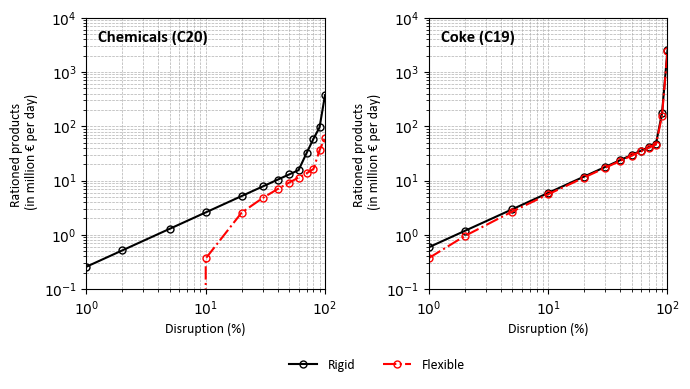

<Figure size 640x480 with 0 Axes>

In [47]:
# Create figure and subplots (1 row, 2 columns)
fig = plt.figure(figsize=(7, 4))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 0.1])  


axes = [fig.add_subplot(gs[0, 0]), fig.add_subplot(gs[0, 1])]

font = 'Calibri'
size_font = 10
label_posx = 0.05
label_posy = 0.95

# Labels for subplots
subplot_labels = ['a', 'b']

ax1 , ax2 = axes


# First plot (using xbase_values)
ax1.plot(rat_results_c20.index * 100, rat_results_c20[0], markersize =5, c = 'k', linewidth = 1.5, marker = 'o', markerfacecolor= 'None', linestyle='-' )
ax1.plot(rat_results_c20.index * 100, rat_results_c20[1], markersize =5, c = 'r', linewidth = 1.5, marker = 'o', markerfacecolor= 'None', linestyle='-.' )

ax1.set_xlim([1, 100])
ax1.set_ylim([0.1, 10000])
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Disruption (%)', fontsize=10, fontname=font)
ax1.set_ylabel('Rationed products \n (in million € per day)', fontsize=10, fontname=font)
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
ax1.text(label_posx, label_posy ,'Chemicals (C20)', transform=ax1.transAxes, fontsize=12, fontweight='bold', fontname = 'Calibri', va='top', ha='left')

# First plot (using xbase_values)
ax2.plot(rat_results_c19.index * 100, rat_results_c19[0], markersize =5, c = 'k', linewidth = 1.5, marker = 'o', markerfacecolor= 'None', linestyle='-' )
ax2.plot(rat_results_c19.index * 100, rat_results_c19[1], markersize =5, c = 'r', linewidth = 1.5, marker = 'o', markerfacecolor= 'None', linestyle='-.' )

ax2.set_xlim([1, 100])
ax2.set_ylim([0.1, 10000])
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlabel('Disruption (%)', fontsize=10, fontname=font)
ax2.set_ylabel('Rationed products \n (in million € per day)', fontsize=10, fontname=font)
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)
ax2.text(label_posx, label_posy ,'Coke (C19)', transform=ax2.transAxes, fontsize=12, fontweight='bold', fontname = 'Calibri', va='top', ha='left')


# Create the legend in the 3rd row (last row)
fig_legend = fig.add_subplot(gs[1, :])  # Span all columns
lines = [
    plt.plot([], [], markersize=5, c= 'k', marker='o', markerfacecolor='none', linestyle='-', linewidth=1.5, label='Rigid')[0],
    plt.plot([], [], markersize=5, c= 'r', marker='o', markerfacecolor='none', linestyle='-.', linewidth=1.5, label='Flexible')[0]

]

fig_legend.legend(handles=lines, loc='center', ncol=3, frameon=False, prop={'family': font, 'size': size_font})
fig_legend.axis('off')  # Hide axes for the legend


plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.savefig(f'c20_c19_rationing.png', dpi=1200, bbox_inches='tight')
plt.show()



plt.tight_layout()

In [50]:
impsum = pd.DataFrame(index = dis_array, columns = [0, 1] )

for i in range(len(dis_array)):
    for j in range(len(ip_array)):

        dis = dis_array[i]
        op_factor = op_array[j]
        imp_flex =  ip_array[j]

        dimp = pd.read_excel(os.path.join(path_c20, f'Dimp3_{op_factor}_{imp_flex}_{dis}_mosek.xlsx'), index_col = [0,1,2], header = [0])
        dimp = dimp.loc[(dimp.index.get_level_values('Index2') == 'NL33') & (dimp.index.get_level_values('Index3') == 'CPA_C20')]
        impsum.loc[dis, j] = dimp.sum().sum() / 365

In [51]:
impsum

,0,1
0.01,0.0,0.260912
0.02,0.0,0.522081
0.05,0.0,1.351471
0.10,0.0,2.532457
0.20,0.0,3.77959
0.30,0.0,3.961736
0.40,0.0,4.143883
0.50,0.0,4.141333
0.60,0.0,4.356742
0.70,0.0,4.372261


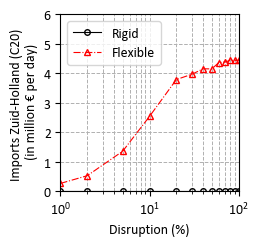

In [60]:
plt.figure(figsize=(2.3, 2.3))

plt.plot(impsum.index*100, impsum[0], markersize =4, c = 'k', linewidth = 0.8, marker = 'o', markerfacecolor='none', linestyle='-' , label = 'Rigid')
plt.plot(impsum.index*100, impsum[1], markersize =4, c = 'r', linewidth = 0.8, marker = '^', markerfacecolor='none', linestyle='-.', label = 'Flexible')



plt.xlim([1,100])
plt.ylim([0,6])
plt.xticks(fontsize= 10, fontname= font)

# plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
# plt.ticklabel_format(axis="y", style="sci", scilimits=(3,3))
# plt.gca().yaxis.get_offset_text().set_fontsize(10) 
# plt.gca().yaxis.get_offset_text().set_fontname(font)

# log scale
plt.xscale('log')


plt.yticks(fontsize=10, fontname= font)
plt.gca().grid(True, which='both', axis='x', linestyle='--', linewidth=0.7)   
plt.gca().grid(True, which='major', axis='y', linestyle='--', linewidth=0.7)

plt.xlabel('Disruption (%)', fontsize=10, fontname=font)
plt.ylabel('Imports Zuid-Holland (C20) \n (in million € per day)', fontsize=10, fontname= font)
plt.legend(prop={'size': 10, 'family': font})  
plt.savefig(f'Impsum.jpeg', dpi=1200, bbox_inches='tight')